In [1]:
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [27]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [3]:
import numpy as np
import pandas as pd
import os
print(os.listdir("bd_stanford"))
print(len(os.listdir("bd_stanford")))

['n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02088466-bloodhound', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02092339-Weimaraner', 'n02097658-silky_terrier', 'n02111129-Leonberg', 'n02111277-Newfoundland', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02113978-Mexican_hairless', 'n02115641-dingo', 'n02115913-dhole', 'n02116738-African_hunting_dog']
15


In [11]:
dir = 'bd_stanford/'
dir_list = os.listdir("bd_stanford")
print(dir_list)
dogs_names = [_[10:] for _ in dir_list]
print(dogs_names)
dir_list = [dir+_ for _ in dir_list]
print(dir_list)

['n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02088466-bloodhound', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02092339-Weimaraner', 'n02097658-silky_terrier', 'n02111129-Leonberg', 'n02111277-Newfoundland', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02113978-Mexican_hairless', 'n02115641-dingo', 'n02115913-dhole', 'n02116738-African_hunting_dog']
['Pekinese', 'Shih-Tzu', 'bloodhound', 'borzoi', 'Irish_wolfhound', 'Weimaraner', 'silky_terrier', 'Leonberg', 'Newfoundland', 'Great_Pyrenees', 'Samoyed', 'Mexican_hairless', 'dingo', 'dhole', 'African_hunting_dog']
['bd_stanford/n02086079-Pekinese', 'bd_stanford/n02086240-Shih-Tzu', 'bd_stanford/n02088466-bloodhound', 'bd_stanford/n02090622-borzoi', 'bd_stanford/n02090721-Irish_wolfhound', 'bd_stanford/n02092339-Weimaraner', 'bd_stanford/n02097658-silky_terrier', 'bd_stanford/n02111129-Leonberg', 'bd_stanford/n02111277-Newfoundland', 'bd_stanford/n02111500-Great_Pyrenees', 'bd_stanford/n02111889-Samoyed', 'bd_stanford/n0211

In [14]:
import cv2
X = []
y_label = []
imgsize = 150
def training_data(label, data_dir):
    print (":", data_dir)
    for img in os.listdir(data_dir):
        path = os.path.join(data_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (imgsize, imgsize))
        X.append(np.array(img))
        y_label.append(str(label))
        
for _ in range(len(dir_list)):
    training_data(dogs_names[_], dir_list[_])

    

bd_stanford/n02086079-Pekinese
: bd_stanford/n02086079-Pekinese
bd_stanford/n02086240-Shih-Tzu
: bd_stanford/n02086240-Shih-Tzu
bd_stanford/n02088466-bloodhound
: bd_stanford/n02088466-bloodhound
bd_stanford/n02090622-borzoi
: bd_stanford/n02090622-borzoi
bd_stanford/n02090721-Irish_wolfhound
: bd_stanford/n02090721-Irish_wolfhound
bd_stanford/n02092339-Weimaraner
: bd_stanford/n02092339-Weimaraner
bd_stanford/n02097658-silky_terrier
: bd_stanford/n02097658-silky_terrier
bd_stanford/n02111129-Leonberg
: bd_stanford/n02111129-Leonberg
bd_stanford/n02111277-Newfoundland
: bd_stanford/n02111277-Newfoundland
bd_stanford/n02111500-Great_Pyrenees
: bd_stanford/n02111500-Great_Pyrenees
bd_stanford/n02111889-Samoyed
: bd_stanford/n02111889-Samoyed
bd_stanford/n02113978-Mexican_hairless
: bd_stanford/n02113978-Mexican_hairless
bd_stanford/n02115641-dingo
: bd_stanford/n02115641-dingo
bd_stanford/n02115913-dhole
: bd_stanford/n02115913-dhole
bd_stanford/n02116738-African_hunting_dog
: bd_stanfor

In [13]:
print(os.listdir(dir_list[0]))

['n02086079_12321.jpg', 'n02086079_13024.jpg', 'n02086079_13647.jpg', 'n02086079_13897.jpg', 'n02086079_14208.jpg', 'n02086079_14307.jpg', 'n02086079_14359.jpg', 'n02086079_14360.jpg', 'n02086079_14532.jpg', 'n02086079_14748.jpg', 'n02086079_14929.jpg', 'n02086079_14999.jpg', 'n02086079_15220.jpg', 'n02086079_15375.jpg', 'n02086079_15842.jpg', 'n02086079_15871.jpg', 'n02086079_15979.jpg', 'n02086079_16268.jpg', 'n02086079_16313.jpg', 'n02086079_16367.jpg', 'n02086079_16693.jpg', 'n02086079_16979.jpg', 'n02086079_17015.jpg', 'n02086079_17103.jpg', 'n02086079_17205.jpg', 'n02086079_17291.jpg', 'n02086079_17564.jpg', 'n02086079_17686.jpg', 'n02086079_17886.jpg', 'n02086079_17983.jpg', 'n02086079_18764.jpg', 'n02086079_18899.jpg', 'n02086079_19690.jpg', 'n02086079_19863.jpg', 'n02086079_20360.jpg', 'n02086079_20762.jpg', 'n02086079_21103.jpg', 'n02086079_21117.jpg', 'n02086079_21987.jpg', 'n02086079_22136.jpg', 'n02086079_22412.jpg', 'n02086079_23100.jpg']


In [15]:
print(y_label)
np.size(y_label)

['Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Pekinese', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Sh

2352

In [17]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label)
y = to_categorical(y,len(dir_list))
X = np.array(X)
X = X/255

In [18]:
print ('X shape：', X.shape)
print ('X first image：', X[1])

X shape： (2352, 150, 150, 3)
X first image： [[[0.44313725 0.43529412 0.45882353]
  [0.45098039 0.44313725 0.46666667]
  [0.4627451  0.45490196 0.47843137]
  ...
  [0.32156863 0.34117647 0.3372549 ]
  [0.31372549 0.33333333 0.32941176]
  [0.35294118 0.34901961 0.36078431]]

 [[0.43137255 0.42352941 0.44705882]
  [0.44313725 0.43529412 0.45882353]
  [0.43921569 0.43137255 0.45490196]
  ...
  [0.45098039 0.47058824 0.46666667]
  [0.4627451  0.48235294 0.47843137]
  [0.48235294 0.50196078 0.49803922]]

 [[0.44313725 0.44313725 0.46666667]
  [0.45490196 0.45098039 0.4745098 ]
  [0.45882353 0.45882353 0.48235294]
  ...
  [0.23137255 0.25098039 0.25098039]
  [0.23137255 0.24705882 0.25098039]
  [0.22745098 0.2627451  0.25098039]]

 ...

 [[0.60392157 0.56078431 0.68627451]
  [0.55686275 0.54117647 0.65490196]
  [0.5254902  0.51764706 0.62352941]
  ...
  [0.31764706 0.35686275 0.39607843]
  [0.34509804 0.38431373 0.42352941]
  [0.29019608 0.3254902  0.3372549 ]]

 [[0.52941176 0.50980392 0.623

In [19]:
print('y shape', y.shape)
print('first encoded label', y[1])

y shape (2352, 15)
first encoded label [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


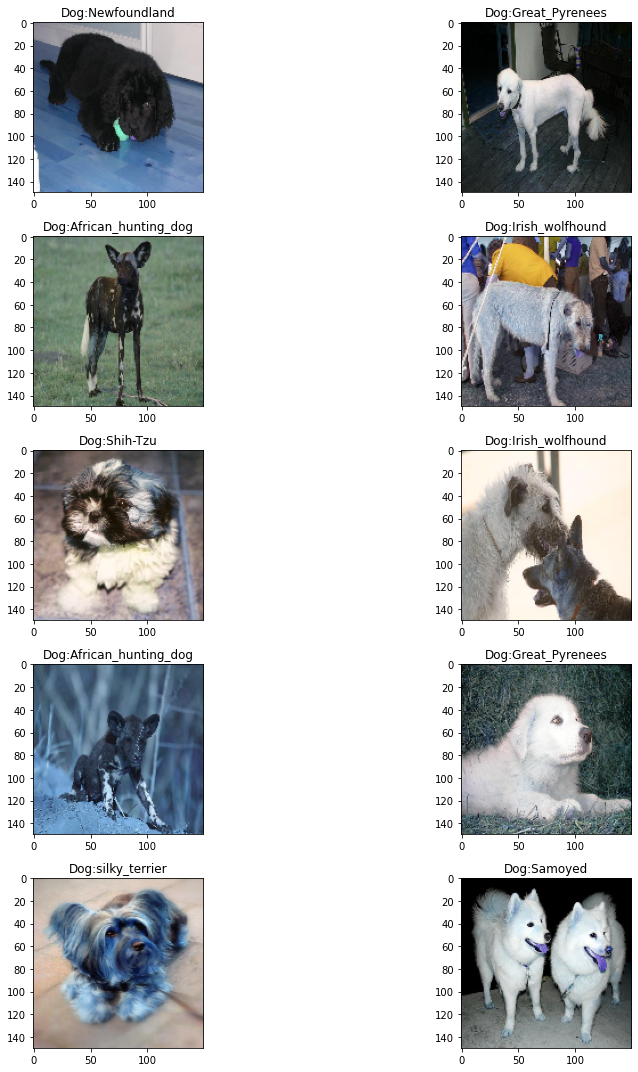

In [20]:
import matplotlib.pyplot as plt
import random as rdm
fig,ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        r = rdm.randint(0,len(X))
        ax[i,j].imshow(X[r])
        ax[i,j].set_title('Dog:' + y_label[r])
plt.tight_layout()


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [24]:
from keras import layers
from keras import models
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Flatten())
cnn.add(layers.Dense(512, activation='relu'))
cnn.add(layers.Dense(len(dir_list), activation='softmax'))
cnn.compile(loss='categorical_crossentropy',
            optimizer='RMSprop',
            metrics=['acc'])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [25]:
history = cnn.fit(X_train, y_train,
                  epochs=50,
                  batch_size=256,
                  validation_data=(X_test, y_test)
)

Epoch 1/50
8/8 [==============================] - 31s 4s/step - loss: 3.0690 - acc: 0.0702 - val_loss: 2.6404 - val_acc: 0.0977
Epoch 2/50
8/8 [==============================] - 27s 3s/step - loss: 2.6369 - acc: 0.0984 - val_loss: 2.6306 - val_acc: 0.0807
Epoch 3/50
8/8 [==============================] - 27s 3s/step - loss: 2.6052 - acc: 0.1148 - val_loss: 3.4648 - val_acc: 0.1125
Epoch 4/50
8/8 [==============================] - 27s 3s/step - loss: 2.7212 - acc: 0.1196 - val_loss: 2.5588 - val_acc: 0.1975
Epoch 5/50
8/8 [==============================] - 28s 3s/step - loss: 2.5503 - acc: 0.1611 - val_loss: 2.5426 - val_acc: 0.1253
Epoch 6/50
8/8 [==============================] - 28s 4s/step - loss: 2.5035 - acc: 0.1722 - val_loss: 2.5502 - val_acc: 0.1571
Epoch 7/50
8/8 [==============================] - 28s 3s/step - loss: 2.3937 - acc: 0.2068 - val_loss: 2.3540 - val_acc: 0.2229
Epoch 8/50
8/8 [==============================] - 28s 3s/step - loss: 2.4167 - acc: 0.2392 - val_loss: 2

In [28]:
print(history.history)

{'loss': [3.0690250396728516, 2.6369152069091797, 2.6051695346832275, 2.721217155456543, 2.550281286239624, 2.503511428833008, 2.3936872482299805, 2.4166860580444336, 2.3545844554901123, 2.2185871601104736, 2.164978504180908, 2.0909790992736816, 2.061967134475708, 1.9697238206863403, 1.8840829133987427, 1.932115912437439, 1.6689728498458862, 1.720310926437378, 1.5907448530197144, 1.5574913024902344, 1.2614554166793823, 1.3430819511413574, 1.1346110105514526, 1.060270071029663, 0.8023956418037415, 0.8666161298751831, 0.6389833688735962, 0.43108686804771423, 0.8013071417808533, 0.20018619298934937, 0.1368420273065567, 1.1973578929901123, 0.11258847266435623, 0.041856564581394196, 0.022142525762319565, 1.3485925197601318, 0.1130904033780098, 0.028616653755307198, 0.027622859925031662, 0.014612996019423008, 0.012101111933588982, 0.003764735534787178, 2.4747514724731445, 0.07457951456308365, 0.01791723445057869, 0.007952415384352207, 0.006502926349639893, 0.0060276612639427185, 0.0946941450

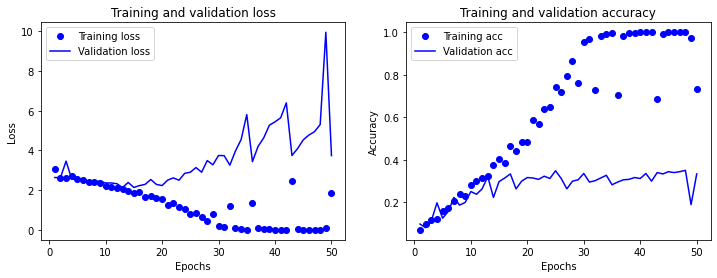

In [29]:
def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
show_history(history)

Epoch 1/50
8/8 [==============================] - 38s 5s/step - loss: 2.6474 - acc: 0.0877 - val_loss: 2.6641 - val_acc: 0.1019
Epoch 2/50
8/8 [==============================] - 35s 4s/step - loss: 2.6051 - acc: 0.1090 - val_loss: 2.6717 - val_acc: 0.1189
Epoch 3/50
8/8 [==============================] - 35s 4s/step - loss: 2.5781 - acc: 0.1217 - val_loss: 2.6592 - val_acc: 0.1146
Epoch 4/50
8/8 [==============================] - 35s 4s/step - loss: 2.5350 - acc: 0.1334 - val_loss: 2.6489 - val_acc: 0.1507
Epoch 5/50
8/8 [==============================] - 35s 4s/step - loss: 2.4761 - acc: 0.1712 - val_loss: 2.6247 - val_acc: 0.1359
Epoch 6/50
8/8 [==============================] - 35s 4s/step - loss: 2.4126 - acc: 0.1861 - val_loss: 2.6064 - val_acc: 0.1699
Epoch 7/50
8/8 [==============================] - 36s 5s/step - loss: 2.3525 - acc: 0.2105 - val_loss: 2.6006 - val_acc: 0.1741
Epoch 8/50
8/8 [==============================] - 36s 4s/step - loss: 2.3162 - acc: 0.2424 - val_loss: 2

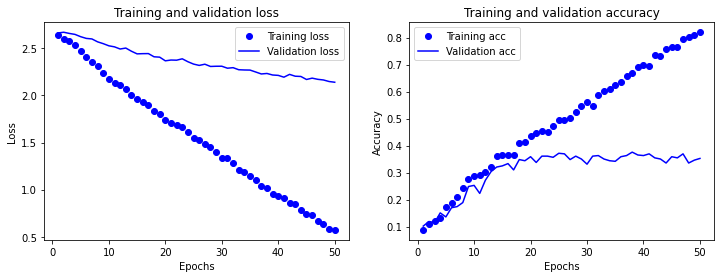

In [31]:
from keras import optimizers # 导入优化器
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 卷积
                       input_shape=(150, 150, 3))) 
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) # 卷积
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu')) # 卷积
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Conv2D(256, (3, 3), activation='relu')) # 卷积
cnn.add(layers.MaxPooling2D((2, 2))) # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.Dense(512, activation='relu')) # 全连接
cnn.add(layers.Dense(len(dir_list), activation='sigmoid')) # 分类输出
cnn.compile(loss='categorical_crossentropy', # 损失函数
            optimizer=optimizers.Adam(lr=1e-4), # 更新优化器并设定学习速率
            metrics=['acc']) # 评估指标
history = cnn.fit(X_train,y_train, # 指定训练集
                  epochs=50,     # 指定轮次
                  batch_size=256, # 指定批量大小
                  validation_data=(X_test,y_test)) # 指定验证集
show_history(history)